In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd

Using TensorFlow backend.
/home/yusuf/anaconda3/envs/DL/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/yusuf/anaconda3/envs/DL/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/yusuf/anaconda3/envs/DL/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/yusuf/anaconda3/envs/DL/lib/p

In [2]:
np.random.seed(7)

dataset = pd.read_csv("kordinat.csv")


print(dataset.columns)

y = dataset["class"].values
print("*****************Y**********")
print(y)
y1=y.copy()

x_data = dataset.drop(["class"],axis=1)

#x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))
x=x_data.values

print("*****************X**********")

print(x)
print(dataset.columns)

Index(['class', 'shoulderLangle', 'shoulderRangle', 'elbowLangle',
       'elbowRangle', 'hipLangle', 'hipRangle', 'kneeLangle', 'kneeRangle'],
      dtype='object')
*****************Y**********
['arkaKol' 'arkaKol' 'arkaKol' ... 'Bacak' 'Bacak' 'Bacak']
*****************X**********
[[ 22.58482949  24.13538377 173.68358679 ... 167.61263228  78.50950313
   77.48278728]
 [ 21.15551397  23.46896614 162.57345399 ... 166.10160123  79.05450618
   78.12940452]
 [ 18.20962618  23.03943874 171.09795047 ... 167.60769143  77.09521562
   76.5802227 ]
 ...
 [ 33.5741864    2.2445398  153.88921733 ...  76.37993114  65.38727344
   62.64667181]
 [ 34.56097513   1.13594151 154.07815949 ...  74.5951739   70.61402452
   65.41439608]
 [ 34.22680315   1.00704693 154.92526138 ...  72.20488902  73.85540602
   68.24748254]]
Index(['class', 'shoulderLangle', 'shoulderRangle', 'elbowLangle',
       'elbowRangle', 'hipLangle', 'hipRangle', 'kneeLangle', 'kneeRangle'],
      dtype='object')


In [3]:
x[:,:9][1]

array([ 21.15551397,  23.46896614, 162.57345399, 151.5994139 ,
       157.77782754, 166.10160123,  79.05450618,  78.12940452])

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#x = (x - np.min(x))/(np.max(x)-np.min(x))
#x[:,-1]=le.fit_transform(x[:,-1])
from collections import Counter
a=y.tolist()
c = Counter(a)
print(c)
print("*******")
y=le.fit_transform(y)
a=y.tolist()
c = Counter(a)
print(c)
#0=AltGogus
#1=Bacak
#2=Sirt
#3=arkaKol
#4=omuz
#5=ÖnKolBar

Counter({'Sirt': 3159, 'Bacak': 2040, 'AltGogus': 1611, 'ÖnKolBar': 955, 'omuz': 623, 'arkaKol': 499})
*******
Counter({2: 3159, 1: 2040, 0: 1611, 5: 955, 4: 623, 3: 499})


In [5]:
class_count=len(dataset.groupby("class").sum())

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)





(7109, 8)
(1778, 8)
(7109,)
(1778,)


In [7]:
y_test[0:334]==0

array([ True, False,  True, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False,  True,  True, False,  True, False,
        True, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
        True, False,  True, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False,

**`KNN`**

In [8]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 16) #   n_neighbors = k  Knn deki key(k) değeri
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(knn.score(x_test,y_test))

0.9977502812148481


DecisionTreeClassifier score:  0.9960629921259843


OMP: Info #154: KMP_AFFINITY: Initial OS proc set respected: 0-3
OMP: Info #214: KMP_AFFINITY: decoding x2APIC ids.
OMP: Info #156: KMP_AFFINITY: 4 available OS procs
OMP: Info #157: KMP_AFFINITY: Uniform topology
OMP: Info #285: KMP_AFFINITY: topology layer "LL cache" is equivalent to "socket".
OMP: Info #285: KMP_AFFINITY: topology layer "L3 cache" is equivalent to "socket".
OMP: Info #285: KMP_AFFINITY: topology layer "L2 cache" is equivalent to "core".
OMP: Info #285: KMP_AFFINITY: topology layer "L1 cache" is equivalent to "core".
OMP: Info #191: KMP_AFFINITY: 1 socket x 2 cores/socket x 2 threads/core (2 total cores)
OMP: Info #216: KMP_AFFINITY: OS proc to physical thread map:
OMP: Info #171: KMP_AFFINITY: OS proc 0 maps to socket 0 core 0 thread 0 
OMP: Info #171: KMP_AFFINITY: OS proc 2 maps to socket 0 core 0 thread 1 
OMP: Info #171: KMP_AFFINITY: OS proc 1 maps to socket 0 core 1 thread 0 
OMP: Info #171: KMP_AFFINITY: OS proc 3 maps to socket 0 core 1 thread 1 
OMP: Info #

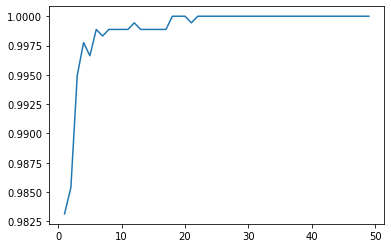

RandomForestClassifier score:  1.0


In [9]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("DecisionTreeClassifier score: ",dt.score(x_test,y_test))

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

skor=[]
for each in range(1,50):
    

    rf=RandomForestClassifier(n_estimators=each,random_state=1)
    rf.fit(x_train,y_train)
    skor.append(rf.score(x_test,y_test))
    
plt.plot(range(1,50),skor)
plt.show()


print("RandomForestClassifier score: ",rf.score(x_test,y_test))


In [10]:
print(" KNN: ",knn.score(x_test,y_test),"\n",
      "RandomForestClassifier: ",rf.score(x_test,y_test),"\n",
      "DecisionTreeClassifier score: ",dt.score(x_test,y_test))

 KNN:  0.9977502812148481 
 RandomForestClassifier:  1.0 
 DecisionTreeClassifier score:  0.9960629921259843


**ANN**

In [11]:
model =Sequential()
model.add(Dense(32,input_dim=8,activation="sigmoid"))
model.add(Dense(32,activation="sigmoid"))

model.add(Dense(class_count,activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 198       
Total params: 1,542
Trainable params: 1,542
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(x_train,y_train,epochs=15,batch_size=16)

2022-01-04 12:15:55.605045: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-04 12:15:55.625449: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2396370000 Hz
2022-01-04 12:15:55.625615: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x559b64cba080 executing computations on platform Host. Devices:
2022-01-04 12:15:55.625635: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2022-01-04 12:15:55.626236: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-01-04 12:15:55.700997: W tensorflow/compiler/jit/ma


Epoch 1/15
 880/7109 [==>...........................] - ETA: 5s - loss: 1.6929 - accuracy: 0.3420   

OMP: Info #252: KMP_AFFINITY: pid 11371 tid 11443 thread 1 bound to OS proc set 1
OMP: Info #252: KMP_AFFINITY: pid 11371 tid 11447 thread 3 bound to OS proc set 3
OMP: Info #252: KMP_AFFINITY: pid 11371 tid 11448 thread 4 bound to OS proc set 0
OMP: Info #252: KMP_AFFINITY: pid 11371 tid 11446 thread 2 bound to OS proc set 2
OMP: Info #252: KMP_AFFINITY: pid 11371 tid 11444 thread 5 bound to OS proc set 1
OMP: Info #252: KMP_AFFINITY: pid 11371 tid 11449 thread 6 bound to OS proc set 2
OMP: Info #252: KMP_AFFINITY: pid 11371 tid 11450 thread 7 bound to OS proc set 3
OMP: Info #252: KMP_AFFINITY: pid 11371 tid 11451 thread 8 bound to OS proc set 0


7109/7109 [==============================] - 1s 200us/step - loss: 1.1620 - accuracy: 0.6445
Epoch 2/15
7109/7109 [==============================] - 1s 119us/step - loss: 0.4626 - accuracy: 0.8640
Epoch 3/15
7109/7109 [==============================] - 1s 120us/step - loss: 0.2399 - accuracy: 0.9366
Epoch 4/15
7109/7109 [==============================] - 1s 114us/step - loss: 0.1520 - accuracy: 0.9717
Epoch 5/15
7109/7109 [==============================] - 1s 125us/step - loss: 0.1059 - accuracy: 0.9775
Epoch 6/15
7109/7109 [==============================] - 1s 123us/step - loss: 0.0773 - accuracy: 0.9820
Epoch 7/15
7109/7109 [==============================] - 1s 119us/step - loss: 0.0602 - accuracy: 0.9840
Epoch 8/15
7109/7109 [==============================] - 1s 108us/step - loss: 0.0483 - accuracy: 0.9869
Epoch 9/15
7109/7109 [==============================] - 1s 108us/step - loss: 0.0420 - accuracy: 0.9879
Epoch 10/15
7109/7109 [==============================] - 1s 115us/step - lo

In [14]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print(test_loss)
print(test_acc)


1778/1778 [==============================] - 0s 85us/step
0.014229897290250313
0.9977502822875977


In [15]:
open("model.json","w").write(model.to_json())
model.save_weights("gymWeights.h5")
        

 

In [16]:
from keras.models import model_from_json

model = model_from_json(open("model.json","r").read())
model.load_weights("gymWeights.h5")


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 198       
Total params: 1,542
Trainable params: 1,542
Non-trainable params: 0
_________________________________________________________________
